In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

In [2]:
from fishchips.experiments import CMB_Primary
from fishchips.cosmo import Observables
import fishchips.util

from classy import Class  # CLASS python wrapper
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# create an Observables object to store information for derivatives

pars = np.array( ['omega_b', 'omega_cdm', 'h',  'A_s', 'n_s', 'tau_reio', 'w0_fld'])
centers = np.array([0.02222,  0.1197,  0.69,  2.1955e-9, 0.9655, 0.06, -1])
steps = np.array([0.0001,     0.001,    0.01,   0.01e-9, 0.005, 0.02, 0.01])

obs = Observables(parameters=pars,
                  fiducial=centers,
                  left=centers-steps,
                  right=centers+steps)

# generate a template CLASS python wrapper configuration
classy_template = {'output': 'tCl pCl lCl',
                   'l_max_scalars': 5000,
                   'lensing': 'yes',
                   'non linear' : 'no',
                   'Omega_Lambda' : 0.0}
classy_template.update(fishchips.util.PRECISE_CLASS_DICT)
print(classy_template)

# generate the fiducial cosmology
obs.compute_cosmo(key='CLASS_fiducial', classy_dict=classy_template)

# generate an observables dictionary, looping over parameters
for par, par_left, par_right in zip(obs.parameters, obs.left, obs.right):
    classy_left = classy_template.copy()
    classy_left[par] = par_left
    classy_right = classy_template.copy()
    classy_right[par] = par_right
    # pass the dictionaries full of configurations to get computed
    obs.compute_cosmo(key=par + '_CLASS_left', classy_dict=classy_left)
    obs.compute_cosmo(key=par + '_CLASS_right', classy_dict=classy_right)
    

{'output': 'tCl pCl lCl', 'l_max_scalars': 5000, 'lensing': 'yes', 'non linear': 'no', 'Omega_Lambda': 0.0, 'neglect_CMB_sources_below_visibility': 0.001, 'perturb_sampling_stepsize': 0.01, 'reionization_optical_depth_tol': 1e-07, 'tol_background_integration': 0.001, 'tol_perturb_integration': 1e-07, 'tol_thermo_integration': 1e-07, 'transfer_neglect_delta_k_S_e': 0.11, 'transfer_neglect_delta_k_S_t0': 0.15, 'transfer_neglect_delta_k_S_t1': 0.04, 'transfer_neglect_delta_k_S_t2': 0.15, 'k_max_tau0_over_l_max': 6, 'accurate_lensing': 1}


In [4]:
# create an Observables object to store information for derivatives

pars = np.array( ['omega_b', 'omega_cdm', 'h',  'A_s', 'n_s', 'tau_reio', 'w0_fld'])
centers = np.array([0.02222,  0.1197,  0.69,  2.1955e-9, 0.9655, 0.06, -1])
steps = np.array([0.0001,     0.001,    0.01,   0.01e-9, 0.005, 0.02, 0.1])

big_obs = Observables(parameters=pars,
                  fiducial=centers,
                  left=centers-steps,
                  right=centers+steps)

# generate a template CLASS python wrapper configuration
classy_template = {'output': 'tCl pCl lCl',
                   'l_max_scalars': 5000,
                   'lensing': 'yes',
                   'non linear' : 'no',
                   'Omega_Lambda' : 0.0}
classy_template.update(fishchips.util.PRECISE_CLASS_DICT)
print(classy_template)

# generate the fiducial cosmology
big_obs.compute_cosmo(key='CLASS_fiducial', classy_dict=classy_template)

# generate an observables dictionary, looping over parameters
for par, par_left, par_right in zip(big_obs.parameters, big_obs.left, big_obs.right):
    classy_left = classy_template.copy()
    classy_left[par] = par_left
    classy_right = classy_template.copy()
    classy_right[par] = par_right
    # pass the dictionaries full of configurations to get computed
    big_obs.compute_cosmo(key=par + '_CLASS_left', classy_dict=classy_left)
    big_obs.compute_cosmo(key=par + '_CLASS_right', classy_dict=classy_right)
    

{'output': 'tCl pCl lCl', 'l_max_scalars': 5000, 'lensing': 'yes', 'non linear': 'no', 'Omega_Lambda': 0.0, 'neglect_CMB_sources_below_visibility': 0.001, 'perturb_sampling_stepsize': 0.01, 'reionization_optical_depth_tol': 1e-07, 'tol_background_integration': 0.001, 'tol_perturb_integration': 1e-07, 'tol_thermo_integration': 1e-07, 'transfer_neglect_delta_k_S_e': 0.11, 'transfer_neglect_delta_k_S_t0': 0.15, 'transfer_neglect_delta_k_S_t1': 0.04, 'transfer_neglect_delta_k_S_t2': 0.15, 'k_max_tau0_over_l_max': 6, 'accurate_lensing': 1}


In [6]:
s4 = fishchips.experiments.get_S4()

generating new axis
['$\\mathrm{omega\\_b}$', '$\\mathrm{omega\\_cdm}$', '$\\mathrm{h}$', '$\\mathrm{A\\_s}$', '$\\mathrm{n\\_s}$', '$\\mathrm{tau\\_reio}$', '$\\mathrm{w0\\_fld}$']
1 sigma w constraint, 0.010214782068190832
['$\\mathrm{omega\\_b}$', '$\\mathrm{omega\\_cdm}$', '$\\mathrm{h}$', '$\\mathrm{A\\_s}$', '$\\mathrm{n\\_s}$', '$\\mathrm{tau\\_reio}$', '$\\mathrm{w0\\_fld}$']
0.010466639101623291


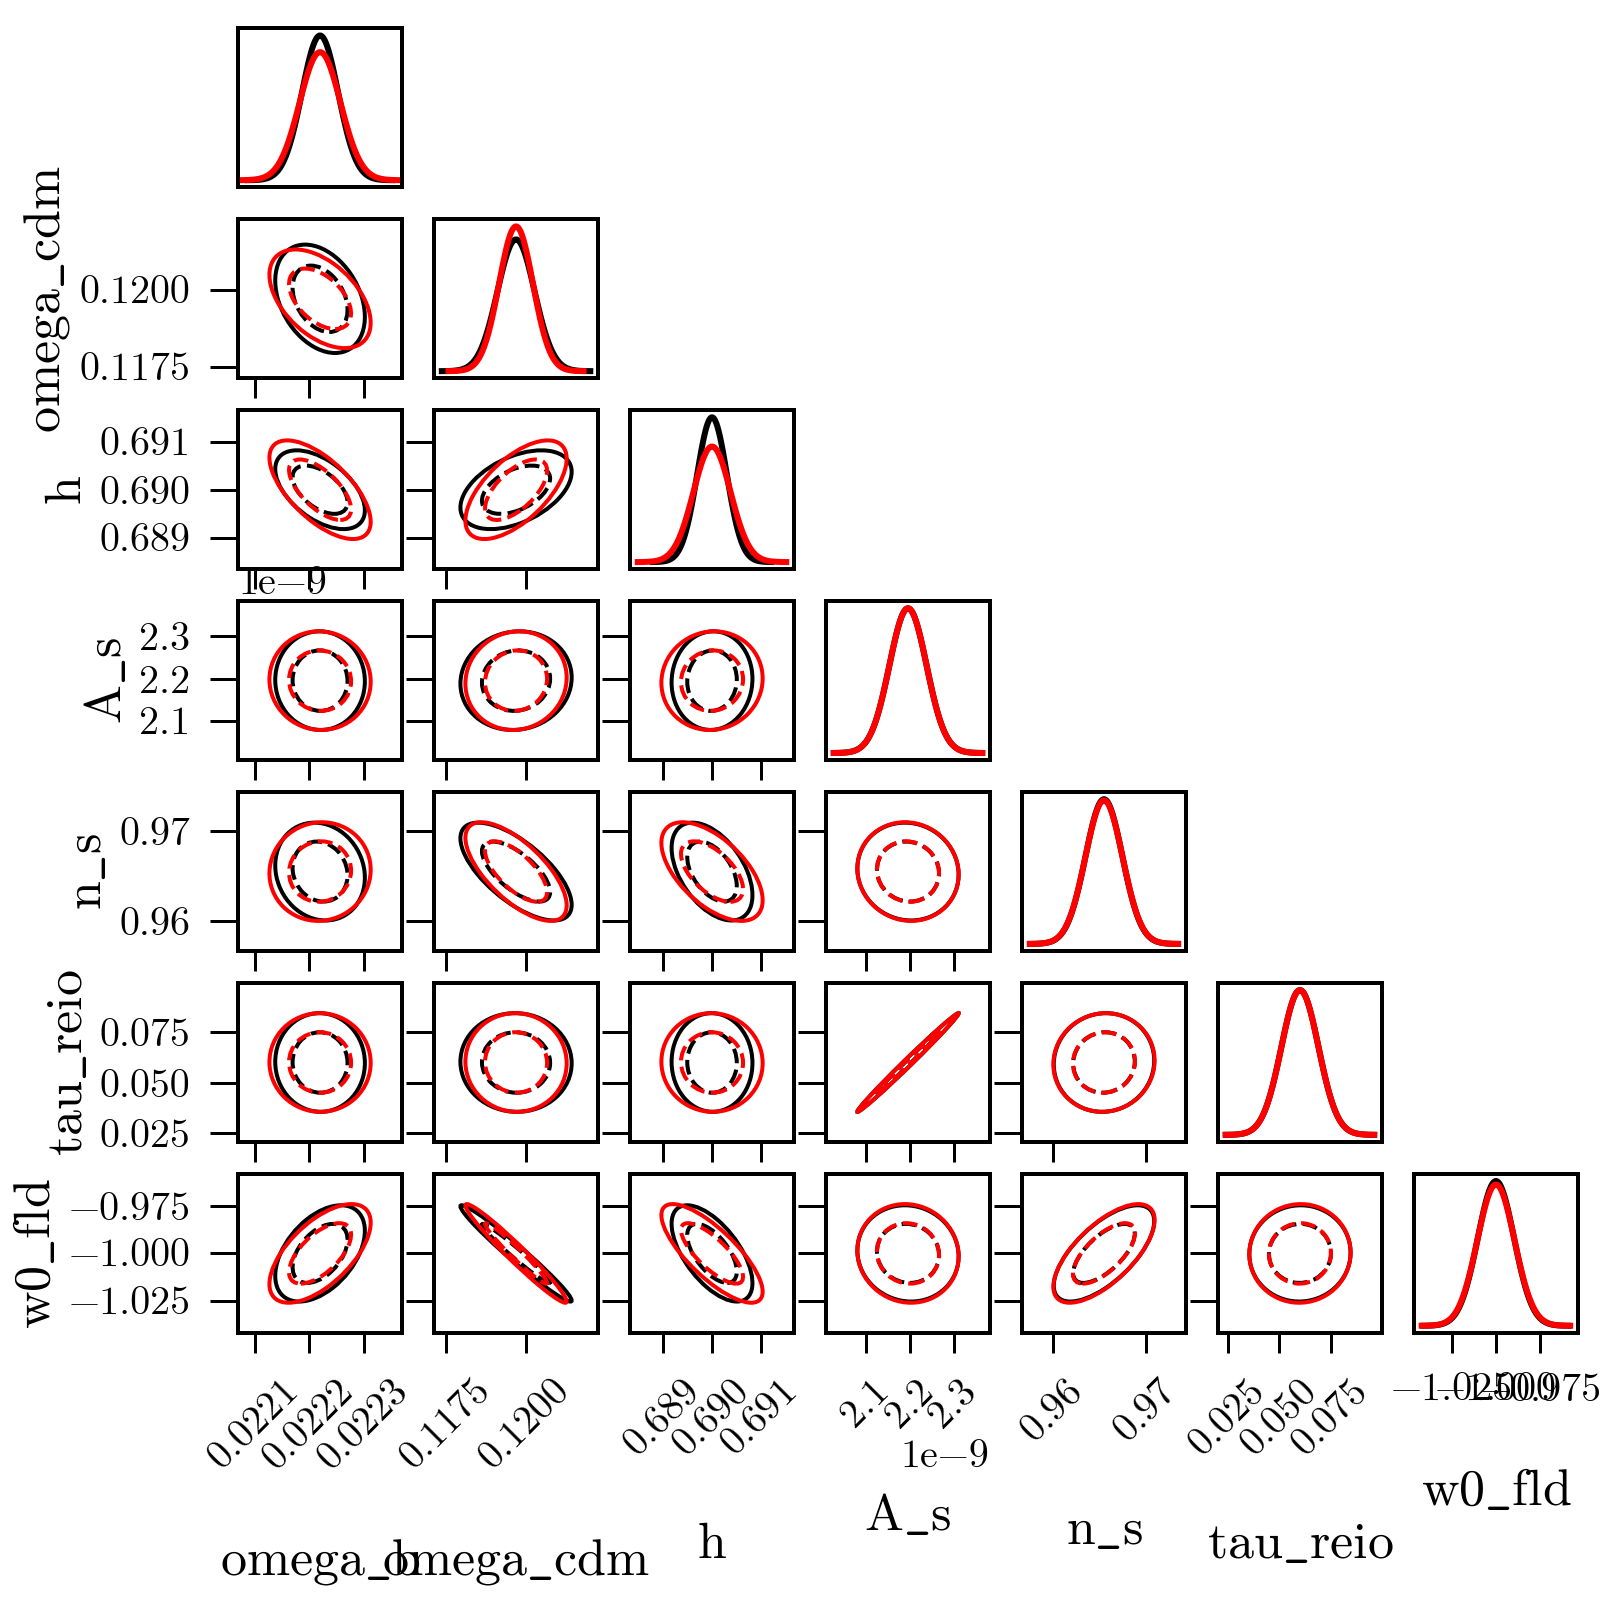

In [8]:
fisher = np.sum( [exp.get_fisher(obs, lensed_Cl=False) for exp in s4], axis=0 )
cov = np.linalg.inv(fisher)
fig, ax = fishchips.util.plot_triangle(obs, cov);
print('1 sigma w constraint,', np.sqrt( cov[-1,-1] ))

fisher = np.sum( [exp.get_fisher(big_obs, lensed_Cl=False) for exp in s4], axis=0 )
cov = np.linalg.inv(fisher)
fig, ax = fishchips.util.plot_triangle(big_obs, cov, fig, ax, color='red');
print(np.sqrt( cov[-1,-1] ))